**Import Necessary Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("seaborn-v0_8-darkgrid")

**Load and Explore the Dataset**


In [3]:
data = pd.read_csv("Population_Vs_Profit.csv")

In [4]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,5.8598,6.8233
2,7.4764,4.3483
3,17.5800,16.4850
4,6.4862,6.5987


In [5]:
data.shape

(105, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  105 non-null    float64
 1   Profit      105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,105.0,9.282954,4.758356,5.0269,5.7292,7.2259,11.7000,22.203
Profit,105.0,6.766483,6.235208,-2.6807,2.4406,5.1337,9.0551,24.147


**Separate Features and Target Variable**


In [8]:
X = data["Population"].values
y = data["Profit"].values

**Visualize The Relationship Between Feature And Target**


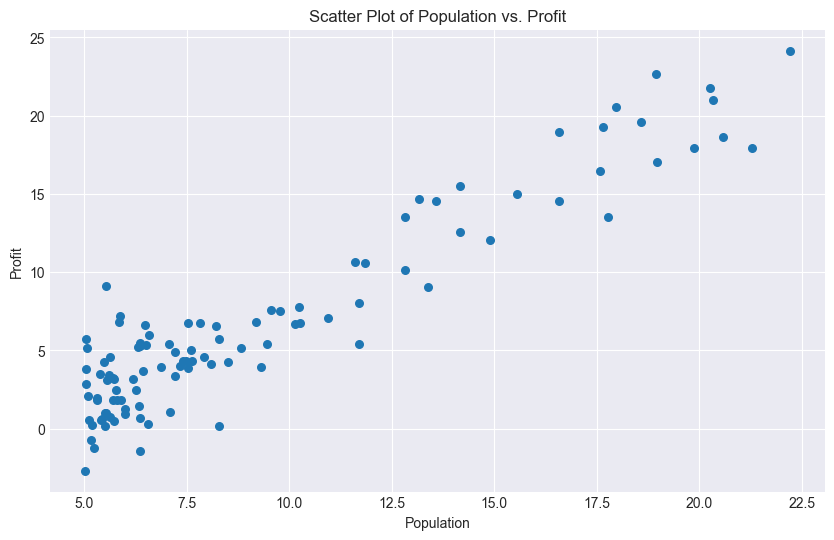

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30)
plt.title("Scatter Plot of Population vs. Profit")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

**Splitting the dataset into the Training set and Test set**


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [12]:
y_train.shape, y_test.shape

((70,), (35,))

**Train the Linear Regression Model**


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

**Make Predictions and Evaluate the Model**


In [15]:
y_test_pred = linear_reg_model.predict(X_test.reshape(-1, 1))
y_train_pred = linear_reg_model.predict(X_train.reshape(-1, 1))

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2:.6f}")

R² Score: 0.881895


**Visualising the Test set results**

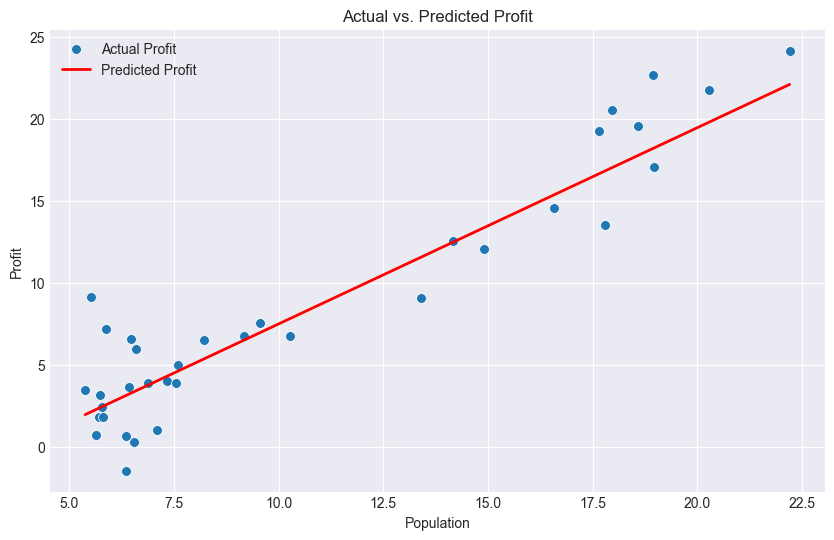

In [18]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test, y=y_test, s=50, label="Actual Profit")
sns.lineplot(x=X_test, y=y_test_pred.ravel(), color="red", linewidth=2, label="Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()
plt.show()

**Visualising the Training set results**

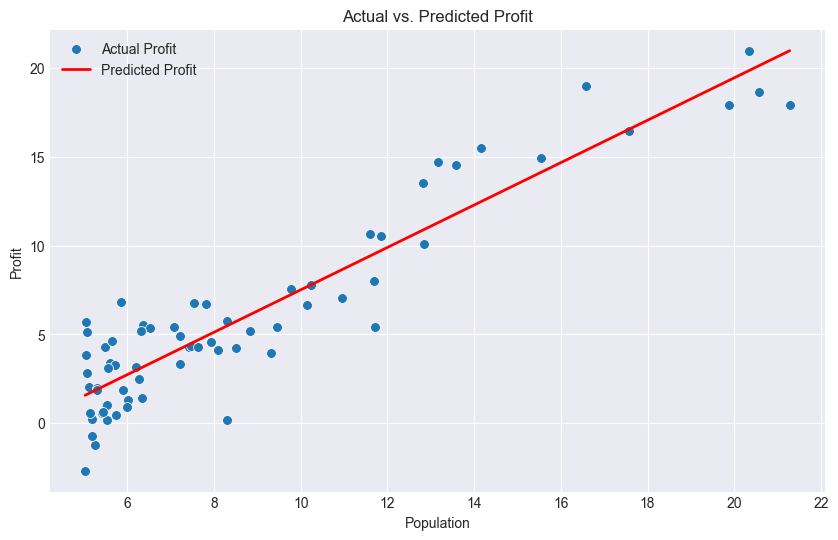

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train, y=y_train, s=50, label="Actual Profit")
sns.lineplot(x=X_train, y=y_train_pred.ravel(), color="red", linewidth=2, label="Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()
plt.show()